# Classification Workbook
Welcome to the Classification workbook. Let's start by importing some of our custom libraries.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

## 1. Classification Algorithms
In the class, we discussed four different classification methods. Let's investigate them in more detail here.

### 1.1. Binary Classification
Binary classification is when the target is determined with True or False. Let's create a simple x and y arrays for exploring conditional classification.

In [2]:
x = np.linspace(0, 1, 100)

In [3]:
np.random.seed(123)
noise = np.random.uniform(-0.2, 0.2, 100)

In [4]:
x+noise

array([ 0.07858767, -0.07544326, -0.0890574 ,  0.05082894,  0.12819163,
        0.01974763,  0.25291174,  0.14463897,  0.07318084,  0.0477561 ,
        0.03828131,  0.20273099,  0.09664102, -0.04481571,  0.10063184,
        0.24671331,  0.03461285,  0.04189787,  0.19443873,  0.20465023,
        0.25578059,  0.35189393,  0.31200435,  0.27673264,  0.3314016 ,
        0.18170882,  0.20734172,  0.16403257,  0.2003139 ,  0.34531974,
        0.13987228,  0.28661178,  0.29557743,  0.33080737,  0.31376646,
        0.27843984,  0.33417689,  0.53109304,  0.56150239,  0.39467406,
        0.45362158,  0.26038877,  0.35115662,  0.40027392,  0.59096811,
        0.3547276 ,  0.45786017,  0.66897139,  0.49264253,  0.54010731,
        0.35330197,  0.64568784,  0.56647658,  0.55338074,  0.48256008,
        0.47720387,  0.53246545,  0.64827788,  0.73604132,  0.60012853,
        0.67378612,  0.65053624,  0.67622403,  0.70623926,  0.78340162,
        0.48984365,  0.7721398 ,  0.57423423,  0.56455787,  0.72

In [5]:
(x+noise)>0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [6]:
((x+noise)>0.5).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
y = ((x+noise)>0.5).astype(int)

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
x>0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

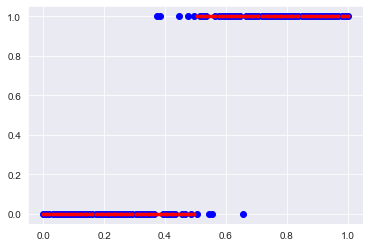

In [10]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

ax.plot(x, x>0.5, 'r.')
ax.scatter(x, y, color='b')

Simple as that, we built a mask that attributes values below 0.5 to 0 and above 0.5 to 1. When we use an encoder for a binary classification problem, we can use this type of classification easily.

### 1.2. Logistic Regression
We have used Logistic Regression before, but unlike the name implies LogisticRegression is best suited for classification problems.

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr_model = LogisticRegression()

In [14]:
lr_model.fit(x.reshape(100,1),y)

LogisticRegression()

In [15]:
lr_model.predict(x.reshape(100,1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
(lr_model.predict(x.reshape(100,1))==y)[:40]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True])

This tells us model doesn't always predict the values of y. Remember with LogisticRegression, it is always wise to look at the probability. 

In [18]:
lr_model.predict_proba(x.reshape(100,1))[:60]

array([[0.89531454, 0.10468546],
       [0.89107222, 0.10892778],
       [0.88667974, 0.11332026],
       [0.88213356, 0.11786644],
       [0.87743021, 0.12256979],
       [0.87256629, 0.12743371],
       [0.8675385 , 0.1324615 ],
       [0.86234363, 0.13765637],
       [0.85697862, 0.14302138],
       [0.85144054, 0.14855946],
       [0.84572661, 0.15427339],
       [0.83983425, 0.16016575],
       [0.83376108, 0.16623892],
       [0.82750492, 0.17249508],
       [0.82106385, 0.17893615],
       [0.8144362 , 0.1855638 ],
       [0.80762059, 0.19237941],
       [0.80061592, 0.19938408],
       [0.79342145, 0.20657855],
       [0.78603676, 0.21396324],
       [0.77846179, 0.22153821],
       [0.77069688, 0.22930312],
       [0.76274275, 0.23725725],
       [0.75460057, 0.24539943],
       [0.74627191, 0.25372809],
       [0.73775882, 0.26224118],
       [0.72906379, 0.27093621],
       [0.72018981, 0.27981019],
       [0.71114034, 0.28885966],
       [0.70191933, 0.29808067],
       [0.

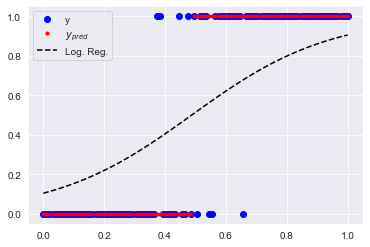

In [19]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

ax.plot(x, y, 'bo', label='y')
ax.plot(x, lr_model.predict(x.reshape(100,1)), 'r.', label='$y_{pred}$')
ax.plot(x, lr_model.predict_proba(x.reshape(100,1))[:,1], 'k--', label='Log. Reg.')
ax.legend()

The probabilities are not as "certain". Remember, we can always fine tune the logistic regression with C, penalty parameter.

### 1.3. Decision Tree and Random Forest Classification
This is also an old friend of ours. Let's see how we can use RandomForest as a classifier.

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf_model = RandomForestClassifier(random_state=123)

In [22]:
rf_model.fit(x.reshape(100,1),y)

RandomForestClassifier(random_state=123)

In [23]:
X = x.reshape(100,1)

In [24]:
pred = rf_model.predict_proba(X)

In [26]:
pred2 = rf_model.predict(X)

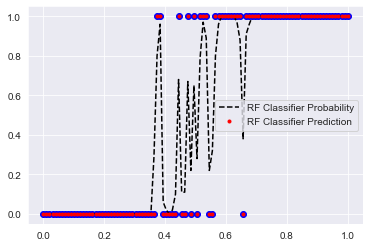

In [34]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

ax.scatter(x, y, color='b')
ax.plot(X, pred[:,1], 'k--', label='RF Classifier Probability')
ax.plot(X, pred2, 'r.', label='RF Classifier Prediction')
ax.legend()

In [28]:
rf_model2 = RandomForestClassifier(random_state=123, n_estimators=10, min_samples_leaf=20)

In [29]:
rf_model2.fit(X,y)

RandomForestClassifier(min_samples_leaf=20, n_estimators=10, random_state=123)

In [31]:
pred_prob_model2 = rf_model2.predict_proba(X)
pred_model2 = rf_model2.predict(X)

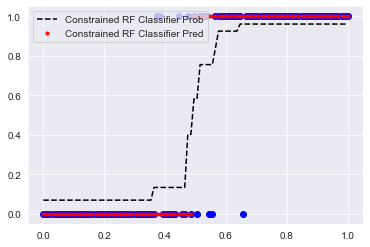

In [32]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

ax.scatter(x, y, color='b')
ax.plot(X, pred_prob_model2[:,1], 'k--', label='Constrained RF Classifier Prob')
ax.plot(X, pred_model2, 'r.', label='Constrained RF Classifier Pred')
ax.legend(loc=2)

### 1.4. k-Nearest Neighbour Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [37]:
knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [41]:
pred_prob4 = knn_model.predict_proba(X)
pred_knn4 = knn_model.predict(X)

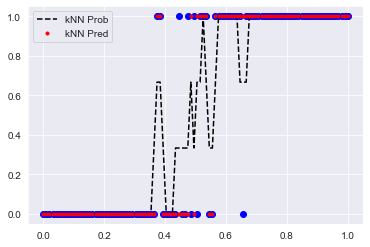

In [42]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

ax.scatter(x, y, color='b')
ax.plot(X, pred_prob4[:,1], 'k--', label='kNN Prob')
ax.plot(X, pred_knn4, 'r.', label='kNN Pred')
ax.legend(loc=2)

Again, we can finetune the kNN to get better results.

In [43]:
knn_model2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn_model2.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

In [44]:
pred5 = knn_model2.predict(X)

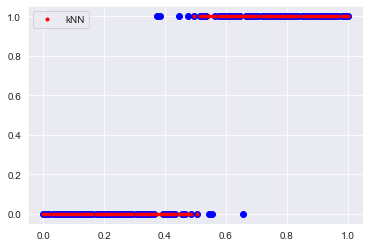

In [46]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

ax.scatter(x, y, color='b')
ax.plot(X, pred5, 'r.', label='kNN')
ax.legend(loc=2)

## 2. Evaluation Methods
Let's remember what our x and y were.

In [47]:
print(X, y)

[[0.        ]
 [0.01010101]
 [0.02020202]
 [0.03030303]
 [0.04040404]
 [0.05050505]
 [0.06060606]
 [0.07070707]
 [0.08080808]
 [0.09090909]
 [0.1010101 ]
 [0.11111111]
 [0.12121212]
 [0.13131313]
 [0.14141414]
 [0.15151515]
 [0.16161616]
 [0.17171717]
 [0.18181818]
 [0.19191919]
 [0.2020202 ]
 [0.21212121]
 [0.22222222]
 [0.23232323]
 [0.24242424]
 [0.25252525]
 [0.26262626]
 [0.27272727]
 [0.28282828]
 [0.29292929]
 [0.3030303 ]
 [0.31313131]
 [0.32323232]
 [0.33333333]
 [0.34343434]
 [0.35353535]
 [0.36363636]
 [0.37373737]
 [0.38383838]
 [0.39393939]
 [0.4040404 ]
 [0.41414141]
 [0.42424242]
 [0.43434343]
 [0.44444444]
 [0.45454545]
 [0.46464646]
 [0.47474747]
 [0.48484848]
 [0.49494949]
 [0.50505051]
 [0.51515152]
 [0.52525253]
 [0.53535354]
 [0.54545455]
 [0.55555556]
 [0.56565657]
 [0.57575758]
 [0.58585859]
 [0.5959596 ]
 [0.60606061]
 [0.61616162]
 [0.62626263]
 [0.63636364]
 [0.64646465]
 [0.65656566]
 [0.66666667]
 [0.67676768]
 [0.68686869]
 [0.6969697 ]
 [0.70707071]
 [0.71

### 2.1. Accuracy Score
We start with the simple accuracy score. 

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
pred = lr_model.predict(X)

In [50]:
pred2 = rf_model.predict(X)

In [51]:
pred3 = rf_model2.predict(X)

In [52]:
pred4 = knn_model.predict(X)

In [53]:
print( 'Logistic Reg. Acc:', accuracy_score(y, pred))
print( 'Random Forest Acc:', accuracy_score(y, pred2))
print( 'Constrained Random Forest Acc:', accuracy_score(y, pred3))
print( 'KNN Acc:', accuracy_score(y, pred4))

Logistic Reg. Acc: 0.92
Random Forest Acc: 1.0
Constrained Random Forest Acc: 0.92
KNN Acc: 0.94


This is what the metric says, but is something fishy?

### 2.2. Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
print('Log. Reg.:\n', confusion_matrix(y, pred))

Log. Reg.:
 [[45  4]
 [ 4 47]]


In [56]:
print('Random Forest:\n',confusion_matrix(y, pred2))

Random Forest:
 [[49  0]
 [ 0 51]]


In [57]:
print('Const. RF.:\n', confusion_matrix(y, pred3))

Const. RF.:
 [[45  4]
 [ 4 47]]


In [58]:
print('KNN:\n', confusion_matrix(y, pred4))

KNN:
 [[46  3]
 [ 3 48]]


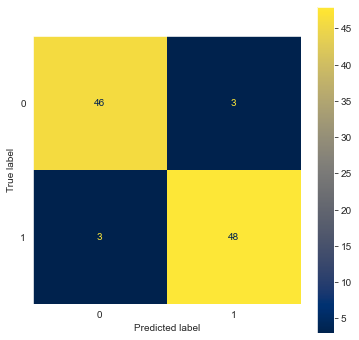

In [59]:
from sklearn.metrics import plot_confusion_matrix
fig = plt.figure(figsize=[6,6])
ax = plt.subplot(111)
cb = plot_confusion_matrix(knn_model, X, y, ax=ax,cmap='cividis') 
ax.grid()
plt.show()

Okay, this is more revealing about the performance of the individual model.

### 2.3. Precision-Recall
Precision and recall is another way of assessing the performance of a model.

In [60]:
from sklearn.metrics import precision_recall_curve

In [61]:
print('Log. Reg.:\n', precision_recall_curve(y, pred))
print('Random Forest:\n',precision_recall_curve(y, pred2))
print('Const. RF.:\n', precision_recall_curve(y, pred3))
print('KNN:\n', precision_recall_curve(y, pred4))

Log. Reg.:
 (array([0.51      , 0.92156863, 1.        ]), array([1.        , 0.92156863, 0.        ]), array([0, 1]))
Random Forest:
 (array([1., 1.]), array([1., 0.]), array([1]))
Const. RF.:
 (array([0.51      , 0.92156863, 1.        ]), array([1.        , 0.92156863, 0.        ]), array([0, 1]))
KNN:
 (array([0.51      , 0.94117647, 1.        ]), array([1.        , 0.94117647, 0.        ]), array([0, 1]))


Well, this didn't explain much.

In [62]:
from sklearn.metrics import PrecisionRecallDisplay

Text(0.5, 1.0, 'Log. Reg.')

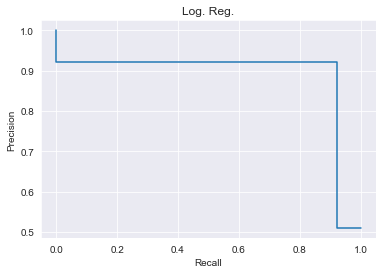

In [63]:
precision, recall, thresholds = precision_recall_curve(y, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
disp.ax_.set_title('Log. Reg.')

In [64]:
thresholds

array([0, 1])

(0.0, 1.2)

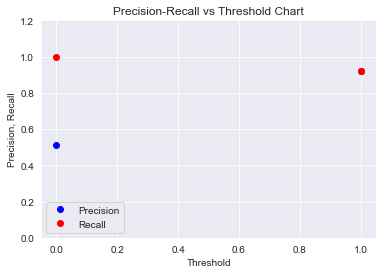

In [65]:
precision, recall, thresholds = precision_recall_curve(y, pred)
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "bo", label="Precision")
plt.plot(thresholds, recall[: -1], "ro", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1.2])

Text(0.5, 1.0, 'RF')

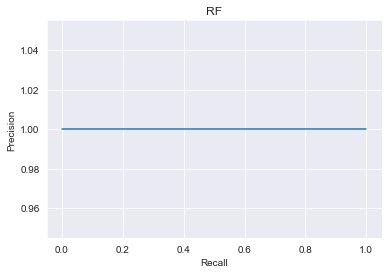

In [66]:
precision, recall, _ = precision_recall_curve(y, pred2)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
disp.ax_.set_title('RF')

Text(0.5, 1.0, 'Constrained RF')

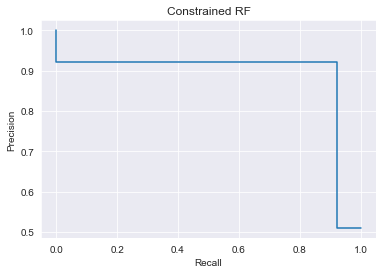

In [67]:
precision, recall, _ = precision_recall_curve(y, pred3)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
disp.ax_.set_title('Constrained RF')

Text(0.5, 1.0, 'KNN')

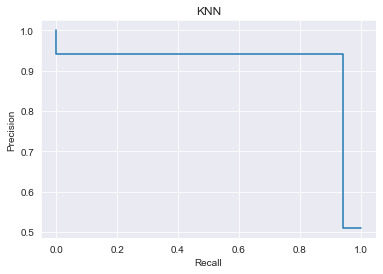

In [68]:
precision, recall, _ = precision_recall_curve(y, pred4)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
disp.ax_.set_title('KNN')

Now we know! Unconstrained Random Forest is overfitting.

### 2.4. ROC Curve
The last performance metric for classifications we wil learn in class today is the ROC curves. This is also very popular among data scientists.

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

In [70]:
# Calculate ROC curve from y and predictions
fpr, tpr, thresholds = roc_curve(y, pred)
lr_df = pd.DataFrame({'FPR': fpr, 'TPR' : tpr, 'Thresholds' : thresholds})

In [71]:
fpr, tpr, thresholds = roc_curve(y, pred2)
rf_df = pd.DataFrame({'FPR': fpr, 'TPR' : tpr, 'Thresholds' : thresholds})

In [72]:
fpr, tpr, thresholds = roc_curve(y, pred3)
crf_df = pd.DataFrame({'FPR': fpr, 'TPR' : tpr, 'Thresholds' : thresholds})

In [73]:
fpr, tpr, thresholds = roc_curve(y, pred4)
knn_df = pd.DataFrame({'FPR': fpr, 'TPR' : tpr, 'Thresholds' : thresholds})

In [74]:
lr_df.head()

,FPR,TPR,Thresholds
0,0.000000,0.000000,2
1,0.081633,0.921569,1
2,1.000000,1.000000,0


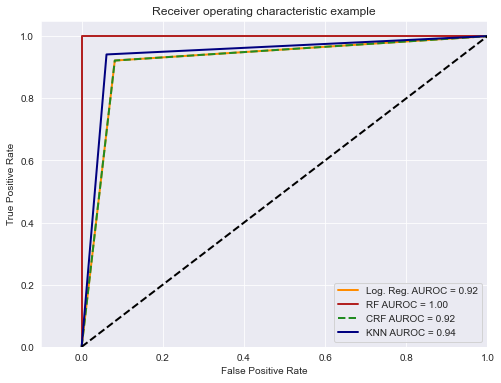

In [75]:
fig = plt.figure(figsize=(8,6))

ax = plt.subplot(111)
ax.plot(lr_df.FPR, lr_df.TPR, color='darkorange',
         linewidth=2, label='Log. Reg. AUROC = {:0.2f}'.format(roc_auc_score(y, pred)))
ax.plot(rf_df.FPR, rf_df.TPR, color='firebrick',
         linewidth=2, label='RF AUROC = {:0.2f}'.format(roc_auc_score(y, pred2)))
ax.plot(crf_df.FPR, crf_df.TPR, color='forestgreen', linestyle='--', 
         linewidth=2, label='CRF AUROC = {:0.2f}'.format(roc_auc_score(y, pred3)))
ax.plot(knn_df.FPR, knn_df.TPR, color='navy',
         linewidth=2, label='KNN AUROC = {:0.2f}'.format(roc_auc_score(y, pred4)))

ax.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
ax.set_xlim([-0.1, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
ax.legend(loc="lower right")
plt.show()

👏 Congratulations, you have completed the Classification Workbook!